In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


#  Importing Libraries

In [1]:
!pip install sentence_transformers

     |████████████████████████████████| 79 kB 4.6 MB/s 
     |████████████████████████████████| 4.0 MB 16.9 MB/s 
     |████████████████████████████████| 1.2 MB 40.9 MB/s 
     |████████████████████████████████| 77 kB 5.8 MB/s 
     |████████████████████████████████| 880 kB 46.1 MB/s 
     |████████████████████████████████| 596 kB 55.6 MB/s 
     |████████████████████████████████| 6.6 MB 44.6 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.0-py3-none-any.whl size=120747 sha256=820fb082261305dcd0b7ba43e833c3d5e21f21ba9f57f3eb41afecb67a214b4a
  Stored in directory: /root/.cache/pip/wheels/83/c0/df/b6873ab7aac3f2465aa9144b6b4c41c4391cfecc027c8b07e7
  Created wheel for sacremoses: filename=sacremoses-0.0.53-py3-none-any.whl size=895260 sha256=4b35490c8af7cd447d9406569d3807cd8f010284d16c62fb84b1f6aeebfa85bf
  Stored in directory: /root/.cache/pip/wheels/87/39/dd/a83eeef36d0bf98e7a4d1933a4ad2d660295a40613079bafc9
Successfully built sentence-transformers sa

In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import glob
import os
import keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding, SpatialDropout1D, Dropout,Bidirectional,Layer
from sklearn import metrics
from sklearn.metrics import classification_report,multilabel_confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

import keras.utils
from keras.utils.vis_utils import plot_model
from sklearn.utils import shuffle
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.layers import Input, Reshape, Dropout
from tensorflow.keras import Model
import csv
from sentence_transformers import SentenceTransformer
import re
import pickle

# Reading Data

In [4]:
'''df = pd.read_csv('/Users/datta/tokhinglish/psuedo_data.csv')'''
'''df = pd.read_csv('psuedo_data.csv')'''
df = pd.read_csv('gdrive/My Drive/Major_Project_Group_11/Pseudo_Labelled_DataSets/psuedo_data.csv')

In [5]:
df=df.loc[:, ~df.columns.str.match('Unnamed')]
df

,text,label_f,label_h,label_s
0,sir lovehate relationship ke bare mein aap ka...,1,0,0
1,same here he is the reason to watch bb but i c...,0,0,0
2,bhai koi iska rape kar doog main bahut khujli ...,0,0,0
3,buuma raviisha baata karaka pata laga aisa api...,1,0,0
4,gajar mein vitamin c hoty hain jis sey aakhon ...,1,0,0
...,...,...,...,...
10461,bas karo aunty aaplog ka gentle rape ho chuka ...,0,0,0
10462,masti he mohl me chahi khumari he saarey thak ...,0,0,0
10463,dekhna ek din koi inke jindagi ka rape karke c...,0,0,0
10464,aur us waqt kisi ne intolarence hai desh mein ...,0,0,1


#  Text Preprocessing

In [6]:
def preprocess_text_data(df):
  replace_by_space = re.compile('[/(){}\[\]\|@,;]')
  bad_sym = re.compile('[^a-z #+_]')
  def clean_text(text):
    text = text.lower()
    text = replace_by_space.sub(' ',text)
    text = bad_sym.sub('', text)
    return text
  df.dropna(subset = ['text'], inplace = True)
  df['text'] = df['text'].apply(clean_text)

In [7]:
df1=df

In [8]:
preprocess_text_data(df1)

# **Embeddings Function**




In [9]:
def get_embeddings(df):
    sentences = list(df['text'])
    model = SentenceTransformer('sentence-transformers/stsb-xlm-r-multilingual')
    embeddings = model.encode(sentences)
    model = SentenceTransformer('bert-base-multilingual-cased')
    embeddingss = model.encode(sentences)
    y=np.add(embeddings,embeddingss)
    y2=np.divide(y,2)
    return embeddings,embeddingss,y2

# **Embeddings and Embeddings Size Reduction**

In [ ]:
embeddings_d_xlm,embeddings_d_bert_multilingual,y8 = get_embeddings(df)

In [ ]:
print(y8)

In [ ]:
embeddings_d_xlm.shape

In [ ]:
embeddings_d_bert_multilingual.shape

In [ ]:
pickle.dump(y8, open('embeddings_combined_data.pkl', 'wb'))

In [10]:
'''y8 = pd.read_pickle('embeddings_combined_data.pkl')'''
y8 = pd.read_pickle('gdrive/My Drive/Major_Project_Group_11/Embeddings/embeddings_combined_data.pkl')

In [11]:
y8

array([[ 0.07760719,  0.26713616,  0.6672787 , ...,  0.00388296,
        -0.042463  ,  0.03016911],
       [ 0.33996582,  0.08725528,  0.02253492, ...,  0.81181246,
        -0.08421463,  0.03725218],
       [ 0.09473173, -0.03542611, -0.09560873, ...,  0.09384529,
        -0.08486855, -0.17937572],
       ...,
       [ 0.11105699,  0.06482825,  0.22452624, ...,  0.29086405,
        -0.1128779 , -0.06746754],
       [ 0.04918349, -0.01484101,  0.40636596, ..., -0.38343456,
         0.05330944,  0.01544872],
       [-0.00106991,  0.24078679,  0.231348  , ...,  0.19082162,
        -0.17955999, -0.0301618 ]], dtype=float32)

In [12]:
encoding_dim = 200
ncol1 = y8.shape[1]
input_dim1 = Input(shape = (ncol1, ))

# Encoder Layers
encoded11 = Dense(768, activation = 'relu')(input_dim1)
encoded21 = Dense(512, activation = 'relu')(encoded11)
encoded31 = Dense(256, activation = 'relu')(encoded21)
encoded131 = Dense(encoding_dim, activation = 'relu')(encoded31)

# Decoder Layers
decoded11 = Dense(256, activation = 'relu')(encoded131)
decoded21 = Dense(512, activation = 'relu')(decoded11)
decoded31 = Dense(768, activation = 'relu')(decoded21)
decoded131 = Dense(ncol1, activation = 'sigmoid')(decoded31)

# Combine Encoder and Deocder layers
autoencoder1 = Model(inputs = input_dim1, outputs = decoded131)

# Compile the Model
autoencoder1.compile(optimizer = 'adadelta', loss = 'binary_crossentropy')

In [13]:
autoencoder1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 768)]             0         
                                                                 
 dense (Dense)               (None, 768)               590592    
                                                                 
 dense_1 (Dense)             (None, 512)               393728    
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dense_3 (Dense)             (None, 200)               51400     
                                                                 
 dense_4 (Dense)             (None, 256)               51456     
                                                                 
 dense_5 (Dense)             (None, 512)               131584

In [14]:
autoencoder1.fit(y8, y8,epochs = 5, batch_size = 32, shuffle = False, validation_data = (y8,y8))

Epoch 1/5
328/328 [==============================] - 13s 36ms/step - loss: 0.6926 - val_loss: 0.6925
Epoch 2/5
328/328 [==============================] - 11s 35ms/step - loss: 0.6923 - val_loss: 0.6922
Epoch 3/5
328/328 [==============================] - 11s 34ms/step - loss: 0.6920 - val_loss: 0.6919
Epoch 4/5
328/328 [==============================] - 11s 34ms/step - loss: 0.6917 - val_loss: 0.6916
Epoch 5/5
328/328 [==============================] - 11s 33ms/step - loss: 0.6914 - val_loss: 0.6913


In [15]:
encoder1 = Model(inputs = input_dim1, outputs = encoded131)
encoded_input1 = Input(shape = (encoding_dim, ))

In [16]:
yed = pd.DataFrame(encoder1.predict(y8))

In [17]:
print(yed.shape)
yed.head()

(10466, 200)


,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.207439,0.0,0.188820,0.274064,0.119063,0.216703,0.103466,0.109901,0.0,0.115876,...,0.0,0.051464,0.000000,0.092875,0.00000,0.0,0.088073,0.000000,0.056300,0.177524
1,0.139779,0.0,0.160712,0.144819,0.119884,0.251191,0.041279,0.000000,0.0,0.000000,...,0.0,0.036622,0.000000,0.101681,0.00000,0.0,0.004668,0.190007,0.087610,0.043397
2,0.168680,0.0,0.187671,0.133500,0.000000,0.303209,0.122699,0.000000,0.0,0.164493,...,0.0,0.000000,0.010392,0.073193,0.00000,0.0,0.094078,0.008823,0.060096,0.182042
3,0.232834,0.0,0.058876,0.165108,0.000000,0.229992,0.010537,0.046739,0.0,0.095023,...,0.0,0.000000,0.000000,0.000000,0.00000,0.0,0.074707,0.060313,0.046683,0.152774
4,0.270723,0.0,0.097215,0.184473,0.054438,0.248111,0.062743,0.056549,0.0,0.123153,...,0.0,0.000000,0.000000,0.086952,0.06726,0.0,0.066948,0.068303,0.075824,0.212705


In [18]:
yedn = yed.to_numpy()


In [19]:
yedn.shape

(10466, 200)

In [20]:
yedn = np.reshape(yedn,(yedn.shape[0], 1, yedn.shape[1]))

In [21]:
yedn.shape

(10466, 1, 200)

In [22]:
y = df[["label_f", "label_h", "label_s"]]

In [23]:
y = y.values

In [24]:
y.shape

(10466, 3)

In [25]:
x_traind, x_testd, y_traind, y_testd = train_test_split(yedn,y, test_size=0.15, random_state= 41)

In [26]:
y_traind

array([[0, 1, 0],
       [0, 0, 0],
       [1, 0, 1],
       ...,
       [1, 0, 0],
       [1, 0, 0],
       [1, 1, 0]])

In [27]:
import keras.backend as K

In [28]:
#Attention Function

class attention(Layer):
    def __init__(self,**kwargs):
        super(attention,self).__init__(**kwargs)

    def build(self,input_shape):
        self.W=self.add_weight(name="att_weight",shape=(input_shape[-1],1),initializer="normal")
        self.b=self.add_weight(name="att_bias",shape=(input_shape[1],1),initializer="zeros")        
        super(attention, self).build(input_shape)

    def call(self,x):
        et=K.squeeze(K.tanh(K.dot(x,self.W)+self.b),axis=-1)
        at=K.softmax(et)
        at=K.expand_dims(at,axis=-1)
        output=x*at
        return K.sum(output,axis=1)

    def compute_output_shape(self,input_shape):
        return (input_shape[0],input_shape[-1])

    def get_config(self):
        return super(attention,self).get_config()


# **Bi-Lstm Model with Attention Layer using softmax**

In [92]:
model1 = Sequential()
model1.add(LSTM(200,input_shape=(1,200),return_sequences=True))
model1.add(Dropout(0.3))
model1.add(Bidirectional(LSTM(128, return_sequences=True,activation='relu')))
model1.add(attention())
model1.add(Dropout(0.3))
model1.add(Dense(3, activation='softmax'))
model1.compile(loss="binary_crossentropy", optimizer = 'adam', metrics = ['accuracy'])
model1.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_20 (LSTM)              (None, 1, 200)            320800    
                                                                 
 dropout_18 (Dropout)        (None, 1, 200)            0         
                                                                 
 bidirectional_11 (Bidirecti  (None, 1, 256)           336896    
 onal)                                                           
                                                                 
 attention_10 (attention)    (None, 256)               257       
                                                                 
 dropout_19 (Dropout)        (None, 256)               0         
                                                                 
 dense_16 (Dense)            (None, 3)                 771       
                                                      

In [93]:
history = model1.fit(x_traind,y_traind, epochs=22, batch_size=128, validation_split=0.2)

Epoch 1/22
56/56 [==============================] - 7s 39ms/step - loss: 0.6206 - accuracy: 0.7906 - val_loss: 0.5818 - val_accuracy: 0.8045
Epoch 2/22
56/56 [==============================] - 1s 25ms/step - loss: 0.5762 - accuracy: 0.8040 - val_loss: 0.5493 - val_accuracy: 0.8045
Epoch 3/22
56/56 [==============================] - 1s 25ms/step - loss: 0.5470 - accuracy: 0.7996 - val_loss: 0.5335 - val_accuracy: 0.7994
Epoch 4/22
56/56 [==============================] - 1s 25ms/step - loss: 0.5336 - accuracy: 0.7737 - val_loss: 0.5254 - val_accuracy: 0.7607
Epoch 5/22
56/56 [==============================] - 1s 25ms/step - loss: 0.5264 - accuracy: 0.7534 - val_loss: 0.5123 - val_accuracy: 0.7640
Epoch 6/22
56/56 [==============================] - 1s 25ms/step - loss: 0.5189 - accuracy: 0.7427 - val_loss: 0.5050 - val_accuracy: 0.7494
Epoch 7/22
56/56 [==============================] - 1s 25ms/step - loss: 0.5123 - accuracy: 0.7362 - val_loss: 0.5029 - val_accuracy: 0.7685
Epoch 8/22
56

In [94]:
y_generated = model1.predict(x_testd)

In [95]:
y_generated

array([[9.4351375e-01, 4.4089291e-02, 1.2396991e-02],
       [4.7437873e-01, 5.5072138e-05, 5.2556622e-01],
       [4.5737943e-01, 5.6397442e-02, 4.8622316e-01],
       ...,
       [8.3490491e-01, 8.2928263e-02, 8.2166776e-02],
       [6.9471008e-01, 2.8568995e-01, 1.9599948e-02],
       [4.6881479e-01, 1.6100527e-01, 3.7017986e-01]], dtype=float32)

# **Bi-Lstm Model with Attention Layer using sigmoid**

In [76]:
model2 = Sequential()
model2.add(LSTM(200,input_shape=(1,200),return_sequences=True))
model2.add(Dropout(0.3))
model2.add(Bidirectional(LSTM(128, return_sequences=True,activation='relu')))
model2.add(attention())
model2.add(Dropout(0.3))
model2.add(Dense(3, activation='sigmoid'))
model2.compile(loss="binary_crossentropy", optimizer = 'adam', metrics = ['accuracy'])
model2.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_18 (LSTM)              (None, 1, 200)            320800    
                                                                 
 dropout_16 (Dropout)        (None, 1, 200)            0         
                                                                 
 bidirectional_10 (Bidirecti  (None, 1, 256)           336896    
 onal)                                                           
                                                                 
 attention_9 (attention)     (None, 256)               257       
                                                                 
 dropout_17 (Dropout)        (None, 256)               0         
                                                                 
 dense_15 (Dense)            (None, 3)                 771       
                                                      

In [77]:
history = model2.fit(x_traind,y_traind, epochs=22, batch_size=128, validation_split=0.2)

Epoch 1/22
56/56 [==============================] - 6s 38ms/step - loss: 0.6196 - accuracy: 0.7944 - val_loss: 0.5813 - val_accuracy: 0.8045
Epoch 2/22
56/56 [==============================] - 1s 24ms/step - loss: 0.5746 - accuracy: 0.8040 - val_loss: 0.5481 - val_accuracy: 0.8045
Epoch 3/22
56/56 [==============================] - 1s 24ms/step - loss: 0.5458 - accuracy: 0.7978 - val_loss: 0.5327 - val_accuracy: 0.8101
Epoch 4/22
56/56 [==============================] - 1s 24ms/step - loss: 0.5331 - accuracy: 0.7822 - val_loss: 0.5204 - val_accuracy: 0.7635
Epoch 5/22
56/56 [==============================] - 1s 24ms/step - loss: 0.5253 - accuracy: 0.7558 - val_loss: 0.5115 - val_accuracy: 0.7758
Epoch 6/22
56/56 [==============================] - 1s 24ms/step - loss: 0.5190 - accuracy: 0.7403 - val_loss: 0.5060 - val_accuracy: 0.7528
Epoch 7/22
56/56 [==============================] - 1s 24ms/step - loss: 0.5122 - accuracy: 0.7381 - val_loss: 0.5016 - val_accuracy: 0.7680
Epoch 8/22
56

In [78]:
y_generated1 = model2.predict(x_testd)

In [79]:
y_generated1

array([[9.0446579e-01, 2.0710212e-01, 4.3985039e-02],
       [6.0456347e-01, 1.0902932e-04, 4.9514097e-01],
       [6.5908891e-01, 1.6069886e-01, 5.0699192e-01],
       ...,
       [8.5249889e-01, 3.2407683e-01, 2.3674595e-01],
       [5.8719200e-01, 3.1133547e-01, 1.9388258e-02],
       [4.1862080e-01, 1.6867122e-01, 2.8283823e-01]], dtype=float32)

# **Prediction and cm functions**

In [80]:
def accuracy(sub_df,test_dff):
  pred1 = sub_df
  print('Predicted Values')
  print(pred1)
  y_pred = []
  for sample in  pred1:
    y_pred.append([1 if i>=0.5 else 0 for i in sample ] )
  y_pred = np.array(y_pred)
  print('Predicted Labels')
  print(y_pred)
  print('Accuracy Score:' + str(accuracy_score(np.array(y_pred),np.array(test_dff))))

In [81]:
def classification__report(y_generated,y_test):
  y_pred=[]
  for sample in  y_generated:
    y_pred.append([1 if i>=0.5 else 0 for i in sample ] )
  y_pred = np.array(y_pred)
  y_pred
  print(multilabel_confusion_matrix(y_test, y_pred))
  label_names = ['Label Fake','Label Hate','Label Sentiment']
  print(classification_report(y_test, y_pred,target_names=label_names))

In [82]:
def get_list(l2,k,len2):
  k1 = []
  for i in range(len2):
    k1.append(l2[i][k])
  return k1

In [83]:
def prediction(y_generated):
  len1 = y_generated.shape[0]
  l2 = []
  for i in range(len1):
    l1 = []
    for j in range(3):
            if y_generated[i][j] <0.5:
                l1.append(0)
            else:
                l1.append(1)
    l2.append(l1)
  l2=np.array(l2)
  print(l2)
  len2 = l2.shape[0]
  f1 = get_list(l2,0,len2)
  h1 = get_list(l2,1,len2)
  s1 = get_list(l2,2,len2)
  return f1,h1,s1

In [84]:
def cm_df(k1_t,k1,name,cmap):
  print('                                  '  +name )
  cm = confusion_matrix(k1_t,k1,labels=[0,1])
  cm_df = pd.DataFrame(cm,index = ['0','1'],
                     columns = ['0','1'])
  plt.figure(figsize=(10,5))
  sns.heatmap(cm_df, annot=True, fmt="d", cmap=cmap)
  plt.title('Bi-lstm_model:{0:.3f}'.format(accuracy_score(k1_t,k1)))
  plt.ylabel('True Label')
  plt.xlabel('Predicted Label')
  plt.show()
  print('                                  ')
  print('                                  ')
  print('                                  ')

In [85]:
def testing(y_generated,y_test):
  f1_t = get_list(y_testd,0,y_testd.shape[0])
  h1_t = get_list(y_testd,1,y_testd.shape[0])
  s1_t = get_list(y_testd,2,y_testd.shape[0])
  f1,h1,s1 = prediction(y_generated)

  cm_df(f1_t,f1,'Fake','gist_heat')
  cm_df(h1_t,h1,'Hate','YlOrRd')
  cm_df(s1_t,s1,'Sentiment','PuBu')

In [86]:
classification__report(y_generated,y_testd)

[[[ 300  286]
  [ 251  733]]

 [[1219   76]
  [ 207   68]]

 [[ 940   81]
  [ 384  165]]]
                 precision    recall  f1-score   support

     Label Fake       0.72      0.74      0.73       984
     Label Hate       0.47      0.25      0.32       275
Label Sentiment       0.67      0.30      0.42       549

      micro avg       0.69      0.53      0.60      1808
      macro avg       0.62      0.43      0.49      1808
   weighted avg       0.67      0.53      0.57      1808
    samples avg       0.62      0.47      0.52      1808



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[1 0 0]
 [0 0 1]
 [0 0 0]
 ...
 [1 0 0]
 [1 0 0]
 [0 0 0]]
                                  Fake


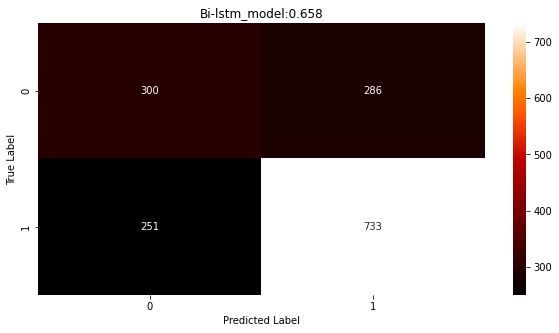

                                  
                                  
                                  
                                  Hate


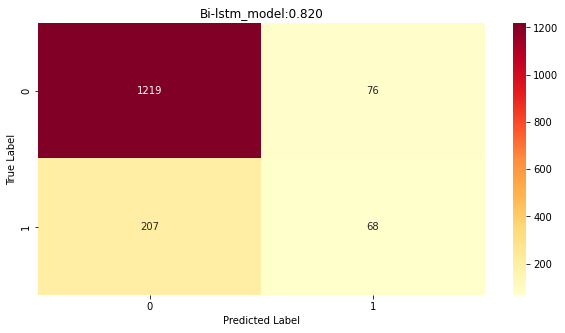

                                  
                                  
                                  
                                  Sentiment


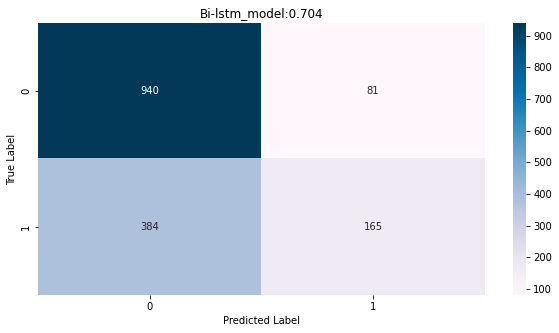

In [87]:
testing(y_generated,y_testd)

In [88]:
accuracy(y_generated,y_testd)

Predicted Values
[[9.4828117e-01 4.2672124e-02 9.0467324e-03]
 [4.8262921e-01 4.6255802e-05 5.1732457e-01]
 [4.9402624e-01 5.7337578e-02 4.4863623e-01]
 ...
 [8.5361946e-01 8.3269209e-02 6.3111342e-02]
 [6.7021132e-01 3.1489778e-01 1.4890928e-02]
 [4.8586035e-01 1.5119967e-01 3.6293995e-01]]
Predicted Labels
[[1 0 0]
 [0 0 1]
 [0 0 0]
 ...
 [1 0 0]
 [1 0 0]
 [0 0 0]]
Accuracy Score:0.36050955414012736


In [89]:
classification__report(y_generated1,y_testd)

[[[ 272  314]
  [ 186  798]]

 [[1249   46]
  [ 233   42]]

 [[ 923   98]
  [ 361  188]]]
                 precision    recall  f1-score   support

     Label Fake       0.72      0.81      0.76       984
     Label Hate       0.48      0.15      0.23       275
Label Sentiment       0.66      0.34      0.45       549

      micro avg       0.69      0.57      0.62      1808
      macro avg       0.62      0.44      0.48      1808
   weighted avg       0.66      0.57      0.59      1808
    samples avg       0.55      0.48      0.50      1808



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[1 0 0]
 [1 0 0]
 [1 0 1]
 ...
 [1 0 0]
 [1 0 0]
 [0 0 0]]
                                  Fake


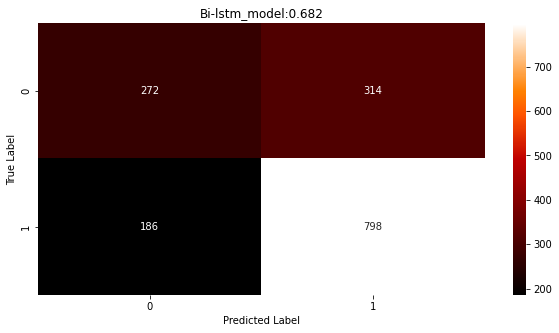

                                  
                                  
                                  
                                  Hate


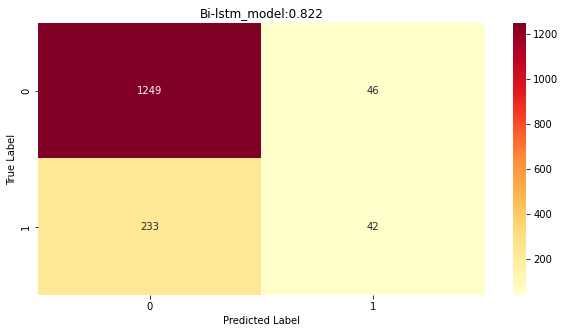

                                  
                                  
                                  
                                  Sentiment


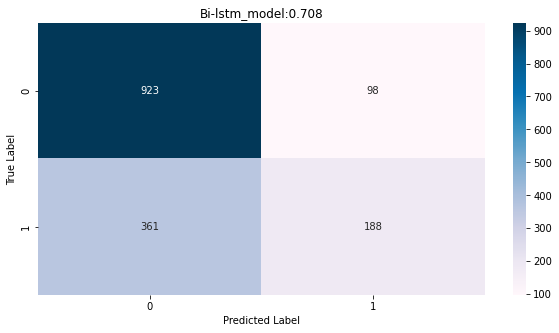

In [90]:
testing(y_generated1,y_testd)

In [91]:
accuracy(y_generated1,y_testd)

Predicted Values
[[9.0446579e-01 2.0710212e-01 4.3985039e-02]
 [6.0456347e-01 1.0902932e-04 4.9514097e-01]
 [6.5908891e-01 1.6069886e-01 5.0699192e-01]
 ...
 [8.5249889e-01 3.2407683e-01 2.3674595e-01]
 [5.8719200e-01 3.1133547e-01 1.9388258e-02]
 [4.1862080e-01 1.6867122e-01 2.8283823e-01]]
Predicted Labels
[[1 0 0]
 [1 0 0]
 [1 0 1]
 ...
 [1 0 0]
 [1 0 0]
 [0 0 0]]
Accuracy Score:0.38471337579617837
